In [213]:
#Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [214]:
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Sheet1")

In [215]:
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,youghrt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurtr,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [216]:
# 1 Item set
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
youghrt                1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurtr             2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [217]:
# 2 Item set
# membuat kombinasi per item menjadi 2 pasangan
from itertools import permutations #Library untuk membuat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'youghrt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurtr'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd '),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 (

In [218]:
# Karena ada kombinasi 0 dan 0 maka dilakukan filter
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'youghrt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'youghrt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'youghrt'),
 ('youghrt', 'whole milk'),
 ('youghrt', 'sausage'),
 ('youghrt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurtr'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('

In [219]:
# menghitung banyaknya kombinasi pembelian
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'youghrt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'youghrt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'youghrt')": 1,
 "('youghrt', 'whole milk')": 1,
 "('youghrt', 'sausage')": 1,
 "('youghrt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurtr')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "

**DAFTAR SUPPORT**


In [220]:
# List support didapat dari jumlah kombinasi
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'youghrt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'youghrt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whol

**DAFTAR CONFIDANCE**

In [221]:
# List Confidens untuk menghitung persentase confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->youghrt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->youghrt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->youghrt  Confidence = 100.0%
youghrt->whole milk  Confidence = 100.0%
youghrt->sausage  Confidence = 100.0%
youghrt->semi-finished bread  Confidence = 100.0%
s

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

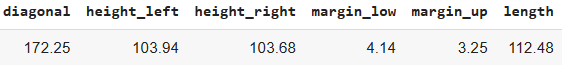
<!-- 1412 -->

In [222]:
df1 =  pd.read_csv("deteksi_uang_palsu.csv")

In [223]:
df1

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [224]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# buat dataframe baru
dbaru = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df1['jarak'] = np.sqrt(
    (df1['diagonal'] - dbaru['diagonal'].values[0])**2
    + (df1['height_left'] - dbaru['height_left'].values[0])**2
    + (df1['height_right'] - dbaru['height_right'].values[0])**2
    + (df1['margin_low'] - dbaru['margin_low'].values[0])**2
    + (df1['margin_up'] - dbaru['margin_up'].values[0])**2
    + (df1['length'] - dbaru['length'].values[0])**2
)

# menampilkan tabel jarak
print('tabel jarak : ')
print(df1['jarak'])

tabel jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: jarak, dtype: float64


In [225]:
# kolom jarak 
pd.set_option('display.max_columns', None)

# atur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df1)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [226]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# mengurutkan data dari kecil ke besar
sorted_data = df1.sort_values('jarak')

# menentukan nilai k
k = int(np.sqrt(len(df1)))

# menentukan data terdekat
data_terdekat = sorted_data.head(k)

# menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [227]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
print("Hasil prediksi nomor 2 : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df1.drop(columns=['is_genuine','jarak'],axis=1)
y_train = df1['is_genuine']

# inisiasi data baru menjadi data tes
test_data = dbaru

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Hasil : "+ ' '.join(map(str, prediksi)))

Hasil prediksi nomor 2 : True 

Hasil : True


# (3) Analisis

> Nama : Agus Tri Setyowati

> Nim : 2109116011


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

**BUSINESS UNDERSTANDING**:
* Dataset tersebut terkait dengan prediksi apakah seorang siswa akan melanjutkan ke perguruan tinggi atau tidak. Informasi ini dapat membantu konselor sekolah untuk memberikan saran dan bantuan pada siswa yang mungkin membutuhkan bantuan dalam memutuskan apakah mereka ingin melanjutkan pendidikan mereka ke perguruan tinggi atau tidak. Dengan memahami faktor-faktor yang mempengaruhi keputusan siswa, konselor sekolah dapat memberikan saran yang lebih tepat dan berfokus pada aspek-aspek yang paling penting bagi siswa. Hal ini dapat membantu meningkatkan tingkat keberhasilan dan kesuksesan siswa dalam jangka panjang.

**DATA UNDERSTANDING**

* Dataset yang digunakan: [https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset]


In [228]:
df2 =  pd.read_csv("data.csv")

In [ ]:
df2

In [230]:
# Membuat variabel df1 dengan label target Academic
df_coba = df2[df2['type_school'] == 'Academic']

# Membuat variabel df2 dengan label bukan Academic
df_coba1 = df2[df2['type_school'] != 'Academic']

# Membuat variabel df3 untuk usia di bawah 50 tahun
df_coba2 = df2[df2['parent_salary'] > 5000000]

In [ ]:
df_coba

In [ ]:
df_coba1

In [ ]:
df_coba2

In [ ]:
# Tampilkan info dataset (df.info()) dan berikan penjelasannya dalam bentuk teks atau comment
df2.info()

**PENJELASAN**:
1.   Data tersebut memiliki 1000 baris dan 11 kolom. Setiap kolom memiliki nama dan tipe datanya masing-masing. Kolom-kolom tersebut adalah:
* type_school dengan tipe data object yang berisi jenis sekolah yang diikuti oleh responden.
* school_accreditation dengan tipe data object yang berisi akreditasi sekolah yang diikuti oleh responden.
* gender dengan tipe data object yang berisi jenis kelamin responden.
* interest dengan tipe data object yang berisi minat responden terhadap pelajaran tertentu.
* residence dengan tipe data object yang berisi tempat tinggal responden.
* parent_age dengan tipe data int64 yang berisi umur orang tua responden.
* parent_salary dengan tipe data int64 yang berisi gaji orang tua responden.
* house_area dengan tipe data float64 yang berisi luas rumah responden.
* average_grades dengan tipe data float64 yang berisi rata-rata nilai responden.
* parent_was_in_college dengan tipe data bool yang menunjukkan apakah orang tua responden pernah kuliah atau tidak.
* will_go_to_college dengan tipe data bool yang menunjukkan apakah responden berencana untuk kuliah atau tidak.
2. Seluruh kolom memiliki 1000 nilai yang tidak kosong, sehingga tidak ada missing value pada data tersebut. Data terdiri dari 2 tipe data numerik (int64 dan float64) dan 3 tipe data kategorikal (object dan bool). Total penggunaan memori untuk data tersebut adalah 72.4+ KB.

In [ ]:
# Tampilkan nilai rata-rata, min,max, dan standar deviasi  untuk setiap kolom bertipe angka
df2.describe()

**EXPLORE DATA**

VISUALISASI COMPARISON

In [ ]:
# Menampilkan perbandingan siswa yang bersekolah academic dan vocatial
count_df = df2['type_school'].value_counts()
sns.barplot(x=count_df.index, y=count_df.values)

In [ ]:
# Menampilkan ketertarikan siswa terhadap perguruan tinggi
sns.countplot(x='interest', data=df2)
plt.xticks(rotation=75)

In [ ]:
# Apakah orang tua yang pernah kuliah mempengaruhi ketertarikan siswa untuk lanjut kuliah
sns.countplot(data=df2, x='interest', hue='parent_was_in_college')
plt.xticks(rotation=75)

In [ ]:
# Menampilkan rata-rata gaji orang tua (parent_salary) berdasarkan tempat tinggal (residence)
# dengan pemisah berdasarkan keputusan akan melanjutkan kuliah (will_go_to_college).
sns.barplot(x='residence', y='parent_salary' ,data=df2, hue='will_go_to_college')

**PENJELASAN**


1. Dalam bar plot ini, kita dapat melihat bahwa jumlah siswa yang bersekolah di sekolah akademik lebih banyak daripada siswa yang bersekolah di sekolah vokasional. akademik sebanyak lebih dari 600 siswa dan vokasi hampir menyentuh angka 400 siswa.
2. Dalam count plot ini menunjukkan bahwa banyak siswa yang sangat tertarik untuk lanjut kuliah, diposisi kedua banyak siswa yang belum memiliki kepastian untuk lanjut kuliah, hampir 250 siswa kurang tertarik untuk kuliah, kemudian hampir 100 siswa tertarik untuk lanjut kuliah, dan sedikit siswa yang tidak tertarik untuk lanjut kuliah
3. Dari count plot ini, terlihat bahwa lebih banyak siswa yang tertarik untuk melanjutkan kuliah jika orang tua mereka pernah kuliah. Siswa dengan orang tua yang pernah kuliah lebih cenderung untuk tertarik untuk melanjutkan kuliah di perguruan tinggi daripada siswa dengan orang tua yang tidak pernah kuliah. Namun, terdapat juga sejumlah besar siswa dengan orang tua yang pernah kuliah yang tidak tertarik untuk melanjutkan kuliah, dan sejumlah siswa dengan orang tua yang tidak pernah kuliah yang tertarik untuk melanjutkan kuliah. Oleh karena itu, meskipun terdapat korelasi antara keinginan siswa untuk melanjutkan kuliah dan apakah orang tua mereka pernah kuliah, faktor lain juga dapat mempengaruhi keputusan siswa.
4. Dari visualisasi tersebut, dapat dilihat bahwa rata-rata gaji orang tua yang tinggal di daerah perkotaan (urban) dan anak-anak mereka akan melanjutkan ke perguruan tinggi lebih tinggi dibandingkan dengan daerah pedesaan (rural) dan pinggiran kota (suburban).


VISUALISASI DISTRIBUTION

In [ ]:
# Membuat gambar histogram parent age dan parent salary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Membuat histogram parent age
sns.histplot(data=df2, x='parent_age', ax=ax1, kde=True)
ax1.set_title('Parent Age Distribution')

# Membuat histogram parent salary
sns.histplot(data=df2, x='parent_salary', ax=ax2, kde=True)
ax2.set_title('Parent Salary Distribution')

In [ ]:
# membandingkan average_grades berdasarkan gender dengan pemisah untuk keputusan
# apakah siswa akan melanjutkan kuliah (will_go_to_college).
sns.boxplot(x="average_grades", y="gender", hue="will_go_to_college", data=df2)

**PENJELASAN**

1. Dari histogram pertama yaitu, umur orang tua (parent age) dapat dilihat bahwa mayoritas orang tua dari siswa di dataset berada pada rentang umur 50 hingga 55 tahun. Sedangkan pada histogram kedua yaitu, gaji orang tua (parent salary distribusion) memperlihatkan bahwa mayoritas gaji orang tua siswa adalah 5 juta sampai 6 juta.
2. Dari plot tersebut, kita dapat melihat bahwa rata-rata nilai siswa perempuan cenderung lebih tinggi daripada rata-rata nilai siswa laki-laki pada kedua kategori rencana melanjutkan kuliah atau tidak. Selain itu, siswa yang berencana melanjutkan kuliah cenderung memiliki rata-rata nilai yang lebih tinggi dibandingkan dengan siswa yang tidak berencana melanjutkan kuliah pada kedua jenis kelamin. Namun, perbedaan rata-rata nilai antara siswa yang berencana melanjutkan kuliah dan yang tidak berencana melanjutkan kuliah lebih jelas pada siswa perempuan daripada pada siswa laki-laki.



**VISUALISASI RELATIONSHIP**

In [ ]:
# Scatterplot untuk parent age dan parent salary
sns.scatterplot(x='parent_salary', y='house_area', data=df2)

**PENJELASAN**

1. Scatterplot memperlihatkan bahwa gaji orang tua rentang 4 sampai 6 juta memiliki luas area rumah 6 - 10 hektar


**VISUALISASI COMPOSITION**

In [ ]:
# Melihat persenan siswa yang tertarik untuk lanjut kuliah
income_counts = df2['interest'].value_counts()
labels = income_counts.index
sizes = income_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('interest')

**PENJELASAN**
1. Dapat dilihat bahwa banyak siswa yang sangat tertarik untuk lanjut kuliah sebanyak 32.4%, siswa yang masih belum bisa memastikan sebanyak 26.1%, siswa yang kurang tertarik 22.9%, siswa yang tertarik 10%, dan tidak tertarik berada diurutan terakhir yaitu 8.6%

In [ ]:
sns.heatmap(df2.corr(), annot=True)

**DATA PREPARATION**

In [ ]:
# mencari data kosong
df2.isna().sum()

In [ ]:
# Encoding
# Merubah tipe data string/kategori menjadi numerik
df3 = pd.get_dummies(df2, columns = ['gender', 'residence'])
df3

In [ ]:
# Menampilkan contoh data secara acak
sample = df2.sample()
sample